# Linear Regression

Linear regression is a statiscal model, which uses a linear approach to find the correlation between two variables, an explanatory varaible and a dependent variable.

The linear regression model here takes on a common approach, using the least-squares method. Least-squares aims to find the line of best fit, by minimising the sum of the residual, the vertical distance between the data points and the line. The term squared is giving as the deviations are squared in order to prevent negative values cancelling out positive values.

In [1]:
'''
Linear Regression model

Model built using least-squares method

y = intercept + slope * x

m = slope
m = Σ(x - x̅) * (y - y̅) / Σ(x -x̅)²

b = intercept
b = y̅ - m * x̅

Object requires x and y

x = explanatory variable
y = dependent variable

'''
class Linearregression:
    import numpy as np
    
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.least_square(x,y)
              
    
    def least_square(self, x, y):
        
        m = sum((self.x - np.mean(self.x)) * (self.y - np.mean(self.y))) / sum(((self.x - np.mean(self.x))**2)) # slope
        
        b = np.mean(self.y) - m * np.mean(self.x) # intercept
        
        sum_residuals = sum((self.y - np.mean(self.y)**2))
        
        self.y_intercept = b + m * self.x
        
        self.r2 = sum((self.y_intercept - np.mean(self.y))**2) / ((self.y - np.mean(self.y))**2)
        
        self.linear = ([self.x.min(),self.x.max()], [self.y_intercept.min(), self.y_intercept.max()])
        
        self.b = b
        self.m = m     
                       
        return self.y_intercept, self.r2, self.linear, self.b, self.m
          
        
    def predict(self,feature_x,true_y, mse = False):
        self.feature_x = feature_x
        self.true_y = true_y
        
        predicted_values = []
        
        for i in range(len(self.feature_x)):
            pred_y = self.b + self.m * self.feature_x[i]
            predicted_values.append(pred_y)
        
        self.pred_y =  pred_y
        self.predicted_values = predicted_values
        
        def mean_square_error(self,true_y, pred_y):
            
            pred_values = np.array(pred_y)
            true_values = np.array(true_y)
            
            mse = np.mean(np.square(true_values - pred_values))        
        
            self.mse = mse
            return self.mse
        
        mean_square_error(self,true_y, pred_y)
        
        
        if mse == True:
            return self.predicted_values, self.pred_y, self.mse
        else:
            return self.predicted_values, self.pred_y

# Compare function to scikit-learn linear regression function

It is important to analyse how well the function performs, to ensure that first the function performs correctly and secondly accurately. In order to do so, the function will be used to perform analysis on a popular dataset Real Estate Price Prediction (https://www.kaggle.com/quantbruce/real-estate-price-prediction). The peformance will be compared to the mainstream library scikit-learn and its linear regression function. Mean square error will the main means of scoring for evaluation and comparison.

In [2]:
# load dataset
import pandas as pd

df = pd.read_csv('Real estate.csv')

In [76]:
# Preview the dataframe
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [77]:
list(df.columns)

['No',
 'X1 transaction date',
 'X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude',
 'Y house price of unit area']

In [78]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Data looks clean, with interesting parameters for comparison. For the analysis 'number of convenience stores' will be compared to 'house price of unit area'. How will the number of convenient stores affect house price?

In [3]:
x = df['X4 number of convenience stores']
x.head()

0    10
1     9
2     5
3     5
4     5
Name: X4 number of convenience stores, dtype: int64

In [4]:
y = df['Y house price of unit area']
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

### Split training and testing (80:20 split)

In [5]:
# Split data into test and training - 80:20 split
# Find 20% of the rows to split into testing
#print(414 *.20)
x_train = x[:-82]
x_test = x[-82:]
# Split targets into test and training
y_train = y[:-82]
y_test = y[-82:]

### Create model using built linear regression function

In [130]:
# Build model with my linear regression model
model1 = Linearregression(x_train,y_train)

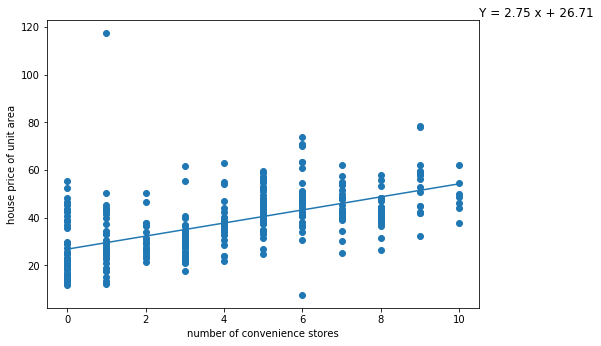

In [117]:
# Plot a regression line using the training data
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])
plt.scatter(x_train,y_train)
plt.plot(x_train, model1.y_intercept)

ax.set_xlabel('number of convenience stores')
ax.set_ylabel('house price of unit area')

ax.text(1,1,r'Y = {:.2f} x + {:.2f}'.format(model1.m, model1.b), fontsize=12,horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)

plt.show()

In [140]:
# Use model to predict values based on the test dataset
y_pred = np.array(y_test)
model1.predict(x_array_test,y_pred,True)

([32.19777650773784,
  40.433627606553,
  40.433627606553,
  43.17891130615806,
  32.19777650773784,
  40.433627606553,
  51.41476240497321,
  40.433627606553,
  26.70720910852774,
  32.19777650773784,
  51.41476240497321,
  48.66947870536816,
  26.70720910852774,
  26.70720910852774,
  32.19777650773784,
  29.452492808132792,
  43.17891130615806,
  40.433627606553,
  40.433627606553,
  34.943060207342896,
  34.943060207342896,
  34.943060207342896,
  29.452492808132792,
  40.433627606553,
  29.452492808132792,
  51.41476240497321,
  43.17891130615806,
  26.70720910852774,
  54.16004610457826,
  48.66947870536816,
  37.68834390694795,
  54.16004610457826,
  45.9241950057631,
  37.68834390694795,
  29.452492808132792,
  32.19777650773784,
  29.452492808132792,
  34.943060207342896,
  40.433627606553,
  40.433627606553,
  45.9241950057631,
  29.452492808132792,
  40.433627606553,
  26.70720910852774,
  32.19777650773784,
  48.66947870536816,
  48.66947870536816,
  43.17891130615806,
  40

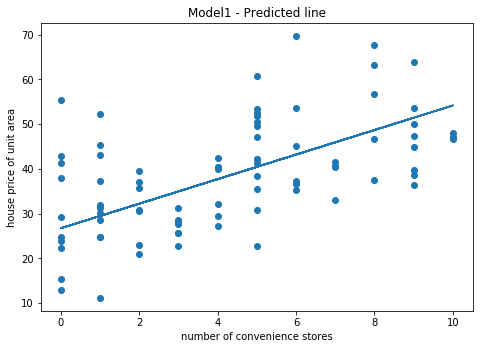

In [145]:
# Plot predicted values
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])
plt.scatter(x_test,y_test)
plt.plot(x_test, model1.predicted_values)

plt.title('Model1 - Predicted line')
ax.set_xlabel('number of convenience stores')
ax.set_ylabel('house price of unit area')

plt.show()

In [146]:
# Print mean square error
print(model1.mse)

312.04274177501196


### Scikit-learn linear regression

In [8]:
# Now compare model to scikit-learn model
# Import libraries
# Import linear regression model from scikit-learn library
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
# Shape data in preparation for training
# Train scikit-learn model
x_array = np.array(x_train)
x_reshape = x_array.reshape(-1, 1)
model_sci = LinearRegression().fit(x_reshape, y_train)

In [10]:
# Use model to predict using the test data 
x_array_test = np.array(x_test)
x_reshape_test = x_array_test.reshape(-1,1) 
sci_y_predict = model_sci.predict(x_reshape_test)

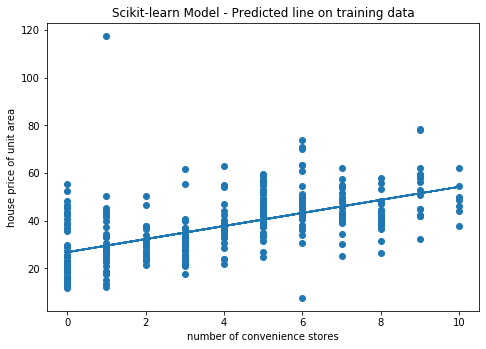

In [13]:
# Plot regression line against training data
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])
plt.scatter(x_train,y_train)
plt.plot(x_reshape_test, sci_y_predict)

plt.title('Scikit-learn Model - Predicted line on training data')
ax.set_xlabel('number of convenience stores')
ax.set_ylabel('house price of unit area')
plt.show()

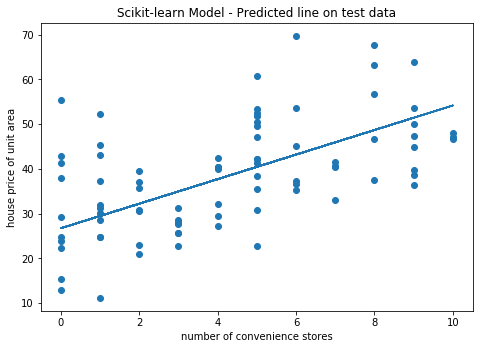

In [15]:
# Regression line with test data
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])
plt.scatter(x_test,y_test)
plt.plot(x_reshape_test, sci_y_predict)

plt.title('Scikit-learn Model - Predicted line on test data')
ax.set_xlabel('number of convenience stores')
ax.set_ylabel('house price of unit area')
plt.show()

In [168]:
# Print mean square error for the scikit-learn model
model_sci = mean_squared_error(y_test,sci_y_predict)
#print(model_sci)

In [173]:
# Compare the models using mean square error
# Higher the number, higher the error
print('Custom LR model: ', model1.mse)
print('Scikit-learn LR model: ', model_sci)

Custom LR model:  312.04274177501196
Scikit-learn LR model:  104.70847201151592


The scikit-learn model out performs my linear regression model by some margin according to the mean square error.  Both models use a simply least squares method for implementation, however the scikit-learn model definately shows a large degree of optimisation, as expected. Implementing gaussian distributions could be used to aid optimisation. The predicted lines when plotted look similar, showing some degree of promise in the model built. There is plenty of room to improve the model, adding variances in Ridge and Lasso, to start, which could be better at predictions.